<a href="https://colab.research.google.com/github/mahhammad/randomized_algorithms/blob/main/Mitzenmacher_and_Eli_Upfal_Exercise_1_26_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise 1.26:** Tic-tac-toe always ends up in a tie if players play optimally. Instead,we may consider random variations of tic-tac-toe.
* (a) First variation: Each of the nine squares is labeled either X or O according to an independent and uniform coin flip. If only one of the players has one (or more) winning tic-tac-toe combinations, that player wins. Otherwise, the game is a tie. Determine the probability that X wins. (You may want to use a computer program to help run through the configurations.)
*(b) Second variation: X and O take turns, with the X player going first. On the X player’s turn, an X is placed on a square chosen independently and uniformly at random from the squares that are still vacant; O plays similarly. The first player to have a winning tic-tac-toe combination wins the game, and a tie occurs if neither player achieves a winning combination. Find the probability that each player wins.(Again, you may want to write a program to help you.)

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import itertools

## **part A:**

در این برنامه با انتساب یک شماره به هر خانه ماتریس به ترتیب ۰ تا ۸ و ذخیره این اعداد به صورت آرایه ساختار بازی را بازنویسی می کنیم در تابع $play$ در آرایه$p_board$  که با کمک $ittertools$ به طور رندوم یکی از مقادیر $X$ و $O$ را به هر خانه انتصاب می دهد و همه لیست های مرتب نه تایی با اعضای $X$ و $O$ را میسازد.سپس بررسی می کند در هر کدام ازین حالت های ممکن چه کسی برنده بازی است. برای تشخیص برنده از تابع $winner$استفاده می کنیم. در اینجا $winnerlist$ تمام حالت هایی که ممکن است بازیکنی برنده باشد در آرایه ذخیره می شود. هر خانه از ساختار داده شده با خانه های موجود در لیست حالت های برنده مقایسه می شود در صورتی که حالتی از برنده در آن ساختار بندی پیدا شود به تعداد برد های آن بازی کن اضافه می شود. 

In [ ]:
class random_tic_tac_a:
  def play(self):
    players=['X','O']
    result=[0,0,0]
    ind={'X':0,'O':1,'T':2}
    for p_board in itertools.product(players, repeat=9):
      winner=self.winner(p_board)
      result[ind[winner]]+=1
    return np.array(result)

  def winner(self,board_list):
    winner_list=[[0,1,2],[0,3,6],[0,4,8],[3,4,5],[1,4,7],[2,5,8],[6,7,8]]
    player={'X':0,'O':0}
    for win in winner_list:
      if board_list[win[0]]==board_list[win[1]] and board_list[win[0]]==board_list[win[2]]:
        player[board_list[win[0]]]+=1
    if player['X']==0 and player['O']>0:
      return 'O'
    elif player['X']>0 and player['O']==0:
      return 'X'
    else :
      return 'T'

('X', 181, 0.353515625) ('O', 181, 0.353515625) ('Tie', 150, 0.29296875)


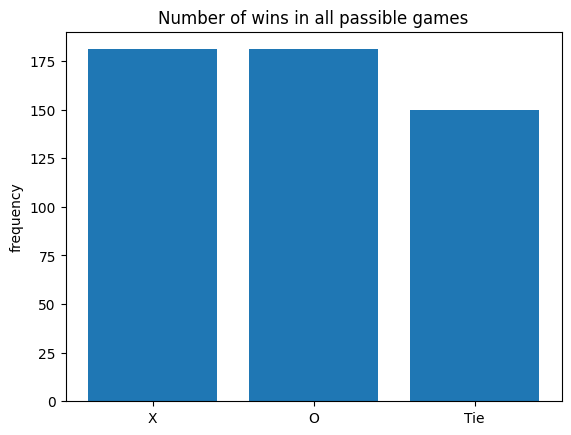

In [ ]:
game=random_tic_tac_a()
res=game.play()
objects = ('X', 'O', 'Tie')
print(*zip(objects,res,res/res.sum()))
plt.bar(objects, res)
plt.title('Number of wins in all passible games');
plt.ylabel("frequency")
plt.show()

از بین $2^9$ حالت ممکن برای بازی $181$ بار آغاز کننده بازی برنده شده است و $181$ بار نیز شرکت کننده دوم بازی را برده است. در این بین $150$ بار نیز تساوی رخ میدهد.که احتمالات آن به صورت زیر بیان میشود:

$P(X wins)=\frac{181}{181}= 0.353515625$

$P(O wins)=\frac{181}{2^9}= 0.353515625$

$P(Tie)=\frac{150}{2^9}=0.29296875$

------------------------------------------------------------------------------


## **part B:**


در این قسمت مشابه قسمت قبلی ماتریس بازی به صورت آرایه باز نویسی شده است. با این تفاوت که در تابع $play$ لیست اولیه را درهم سازی می کند. در این صورت طی پیمایش این لیست و به روز رسانی شدن هر خانه با توجه به این که نوبت کدام بازیکن است شرایط خواسته شده در مسئله این که خانه ها به صورت رندوم انتخاب شوند حفظ شود. سپس با استفاده از تابع $winner$ برنده این لیست درهم شده را پیدا می کنیم. نخست به صورت رندوم یکی از بازیکنان به عنوان شروع کننده انتخاب می شود و نوبت به اون داده می شود. بعد از طی هر مرحله نوبت تغییر خواهد کرد. در طول پیمایش لیست هر گاه به برنده شدن یکی از بازیکنان برسیم بازی متوقف می شود. برای بدست آوردن احتمال دقیق باید همه جایگشت های ممکن $boardList$ را بدست آورد تا تکرار بازی با این لیست ها که با ابزار $ittertools$ انجام گرفته است درنهایت تعداد برد ها و تساوی ها بدست آید. 


In [ ]:
class random_tic_tac_b:
  def play(self,first_player='X'):
    board_list=[0,1,2,3,4,5,6,7,8]
    result=[0,0,0]
    ind={'X':0,'O':1,'T':2}
    for p_board in itertools.permutations(board_list):
      winner=self.winner(p_board,first_player)
      result[ind[winner]]+=1
    return np.array(result)

  def winner(self,board_list,first_player):
    winner_list=[{0,1,2},{0,3,6},{0,4,8},{3,4,5},{1,4,7},{2,5,8},{6,7,8}]
    player={'X':set(),'O':set()}
    turn= first_player if first_player in {'X','O'} else self.random_player()
    for x in board_list:
      player[turn].update({x})
      for win in winner_list:
        if win.issubset(player[turn]):
          return turn
      turn='X' if turn=='O' else 'O'
    return 'T'
  def random_player(self):
    if np.random.rand() > 0.5: 
      return "X"
    else: 
      return "O"

('X', 189216, 0.5214285714285715) ('O', 87264, 0.24047619047619048) ('Tie', 86400, 0.23809523809523808)


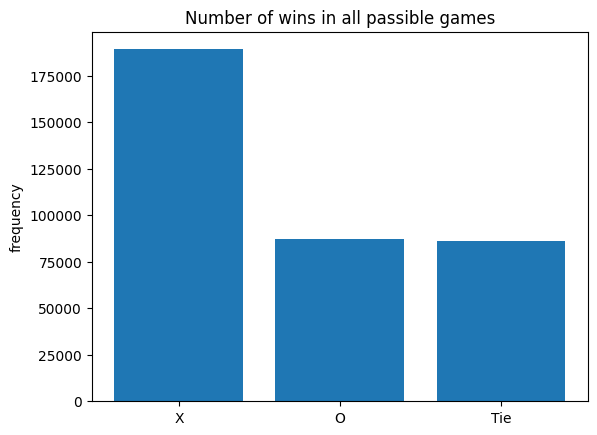

In [ ]:
game=random_tic_tac_b()
res=game.play('X')
objects = ('X', 'O', 'Tie')
print(*zip(objects,res,res/res.sum()))
plt.bar(objects, res)
plt.title('Number of wins in all passible games');
plt.ylabel("frequency")
plt.show()

از بین $9!$ حالت ممکن برای بازی $189216$ بار آغاز کننده بازی برنده شده است و $87264$ بار نیز شرکت کننده دوم بازی را برده است. در این بین $86400$ بار نیز تساوی رخ میدهد.که احتمالات آن به صورت زیر بیان میشود:

$P(X wins |X starts)=\frac{189216}{9!}=0.521428$

$P(O wins |X starts)=\frac{87264}{9!}=0.240476$

$P(Tie |X starts)=\frac{86400}{9!}=0.238095$